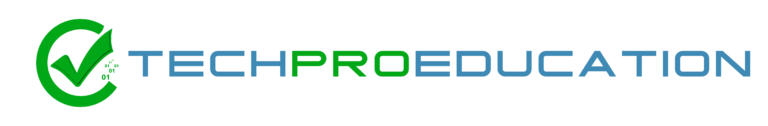

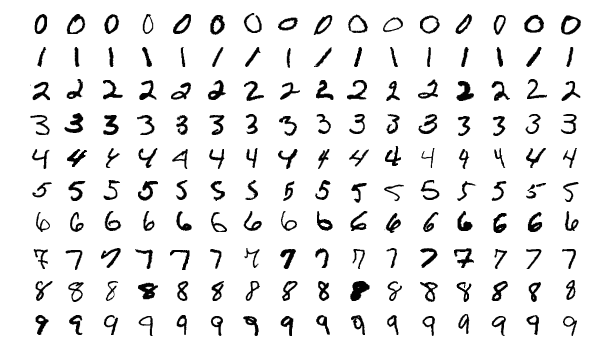

In this notebook, we are going to dive into the MNIST (Modified National Institute of Standards and Technology) database. It can be said that the MNIST handprinted character image dataset is the “Hello World” implementation for machine learning, and the dataset is used as a worldwide machine learning benchmark. It is an extremely good database for people who want to try machine learning techniques and pattern recognition methods on real-world data while spending minimal time and effort on data preprocessing and formatting. Its simplicity and ease of use are what make this dataset so widely used and deeply understood. Therefore, the goal of this tutorial is to show you how this dataset can be used in a digits recognition example using Convolutional Neural Network (CNN), which achieves a high classification accuracy on the test dataset. On a larger perspective, we will emphasize on MNIST’s importance and impact in the world of machine learning.

MNIST is a large database of small, square 28x28 pixel grayscale images of handwritten single digits between 0 and 9. It consists of a total of 70,000 handwritten images of digits, with the training set having 60,000 images and the test set having 10,000. All images are labeled with the respective digit that they represent. There are a total of 10 classes of digits (from 0 to 9).

Our task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively using a CNN that will be able to recognize the handwritten digits. CNN is a type of deep neural network commonly used for computer vision applications. So we will build an image classifier TensorFlow’s Keras API on the MNIST dataset. Keras is a Python library and is highly recommended for beginners due to its smooth learning curve. It is very commonly used in implementing neural networks. 

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
objects= tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels)= objects.load_data()

# mnist=tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


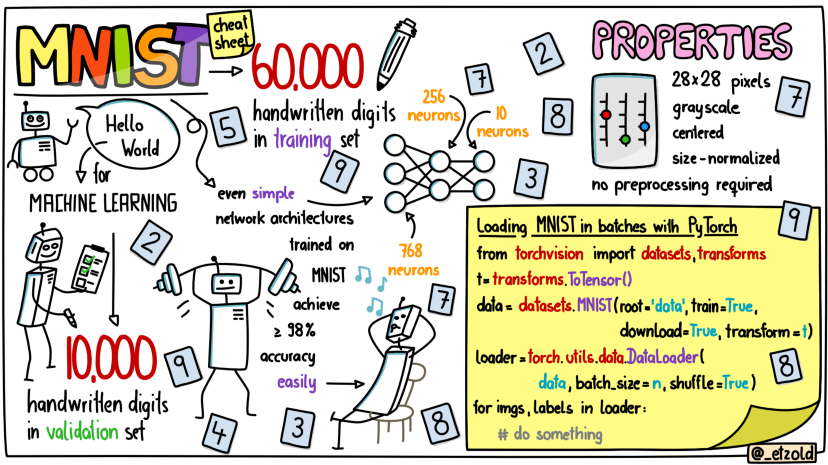

In [3]:
training_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
training_images = training_images / 255.0
test_images = test_images / 255.0

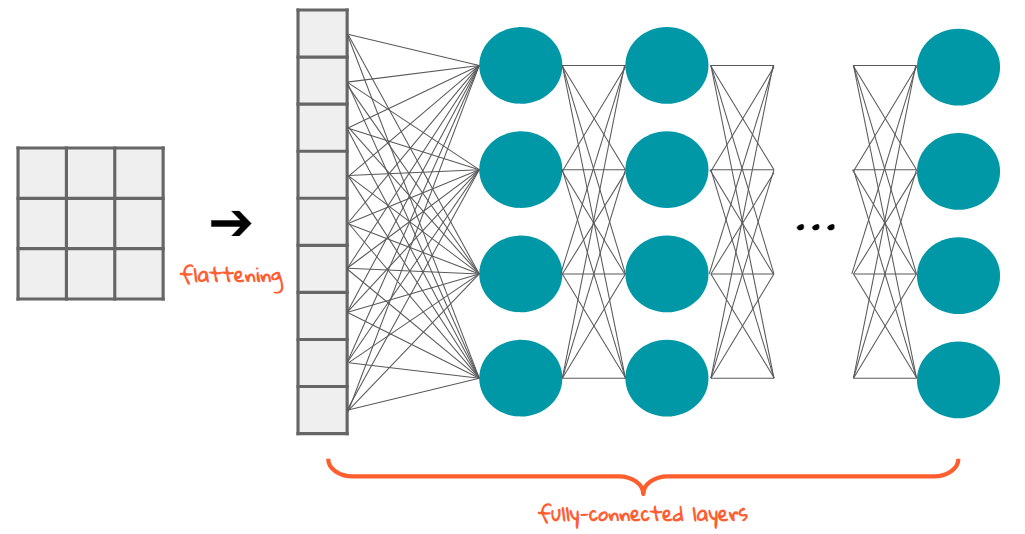

In [6]:
model= tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape= (28,28)),
                                  tf.keras.layers.Dense(128, activation='relu'),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.fit(training_images, training_labels, epochs=100)

Epoch 1/100


1875/1875 [==============================] - 5s 2ms/step - loss: 0.2563 - accuracy: 0.9272
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1144 - accuracy: 0.9666
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0789 - accuracy: 0.9762
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0595 - accuracy: 0.9818
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0447 - accuracy: 0.9863
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0368 - accuracy: 0.9885
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0293 - accuracy: 0.9909
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0246 - accuracy: 0.9919
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0184 - accuracy: 0.9947
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step -

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0027 - accuracy: 0.9992
Epoch 76/100
1875/1875 [==============================] - 5s 3ms/step - loss: 4.7221e-04 - accuracy: 0.9998
Epoch 77/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 78/100
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3574e-04 - accuracy: 0.9998
Epoch 79/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0032 - accuracy: 0.9991
Epoch 80/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0027 - accuracy: 0.9992
Epoch 81/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0016 - accuracy: 0.9996
Epoch 82/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0033 - accuracy: 0.9993
Epoch 83/100
1875/1875 [==============================] - 5s 3ms/step - loss: 8.0249e-04 - accuracy: 0.9997
Epoch 84/100
1875/1875 [==============================] - 5s 3ms/

In [10]:
model.history.history   # Modelin egitimdeki loss ve accuracy history' si 

{'loss': [0.2563301920890808,
  0.11439342796802521,
  0.0789293646812439,
  0.05945197865366936,
  0.044748399406671524,
  0.03684607520699501,
  0.029271181672811508,
  0.024553127586841583,
  0.018382592126727104,
  0.015478824265301228,
  0.01305226981639862,
  0.012185314670205116,
  0.01074465736746788,
  0.009173783473670483,
  0.008342881686985493,
  0.008241252973675728,
  0.008725314401090145,
  0.005190999712795019,
  0.006635215133428574,
  0.005356906913220882,
  0.005031758453696966,
  0.00506071001291275,
  0.00517081655561924,
  0.004774591885507107,
  0.0037058775778859854,
  0.006158657371997833,
  0.0029759849421679974,
  0.00434752507135272,
  0.003738917876034975,
  0.0035003190860152245,
  0.0028567735571414232,
  0.005164295434951782,
  0.0010851086117327213,
  0.00476984353736043,
  0.003823449369519949,
  0.0035045556724071503,
  0.0025105709210038185,
  0.003101327456533909,
  0.004661931190639734,
  0.0019847098737955093,
  0.004836323205381632,
  0.002305373

In [11]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy
0,0.256330,0.927183
1,0.114393,0.966617
2,0.078929,0.976217
3,0.059452,0.981817
4,0.044748,0.986300


Modelimizi test setleri üzerinde evaluate ettik; loss ve acccuracy degerlerini aldik :

In [12]:
print(model.evaluate(test_images, test_labels))

313/313 [==============================] - 1s 2ms/step - loss: 0.2470 - accuracy: 0.9804
[0.24701213836669922, 0.980400025844574]


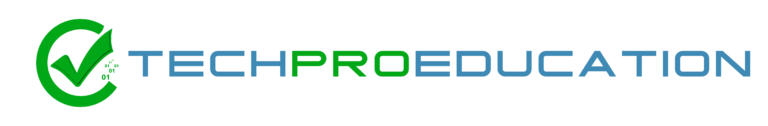

In [13]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.
